In [169]:
import pandas as pd

# abrimos el archivo usando una función específica de pandas
raw_dataset = pd.read_csv("Calidad_de_agua_2021.csv", delimiter=';')

preprocessed_dataset = raw_dataset.copy()

#Eliminamos la columna order porque creemos que no es relevante al igual que el codigo
#Eliminamos la columna año porque estas medidas se tomaron todas en 2021 y admenas esta incluido en la fecha
#tambien eliminamos la columna fecha, ya que se encuentra la estacion del año, y todas las medias de esa estacion se tomaron en un solo dia de la estacion/campaña
preprocessed_dataset = preprocessed_dataset.drop(['año','orden','codigo', 'fecha'], axis=1)

#creo una tabla sin la fecha, la campaña y los sitios, para poder eliminar los datos que se repiten en las demas variables.
datos = preprocessed_dataset.copy()
datos = datos.drop(['sitios','campaña'], axis=1)
indices_duplicados = datos[datos.duplicated(keep=False)].index.tolist()
#notamos que las filas que son iguales, son porque no se midio nada ese dia ese sitio, por lo que decidimos eliminar los datos ya que son irrelevantes/nulos/vacios

preprocessed_dataset.drop(indices_duplicados, axis=0, inplace=True)

In [170]:
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 165
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   sitios                   151 non-null    object
 1   campaña                  151 non-null    object
 2   tem_agua                 151 non-null    object
 3   tem_aire                 147 non-null    object
 4   od                       151 non-null    object
 5   ph                       151 non-null    object
 6   olores                   151 non-null    object
 7   color                    151 non-null    object
 8   espumas                  151 non-null    object
 9   mat_susp                 151 non-null    object
 10  colif_fecales_ufc_100ml  151 non-null    object
 11  escher_coli_ufc_100ml    151 non-null    object
 12  enteroc_ufc_100ml        151 non-null    object
 13  nitrato_mg_l             151 non-null    object
 14  nh4_mg_l                 151 non-null    object

In [171]:
#replazamos todos los datos no medidos por nulos
preprocessed_dataset = preprocessed_dataset.replace('no se midió', pd.NA)

In [172]:
"""
    - Limpiamos los valores distintos/mal escritos por los valores respetados
    - Remplazamos los valores en los que no se midio por nulos
"""
preprocessed_dataset['color'] = preprocessed_dataset['color'].replace(['ausenca','Ausencia ','Ausencia'], False)
preprocessed_dataset['color'] = preprocessed_dataset['color'].replace('Presencia', True)
preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace(['ausenca','Ausencia ','Ausencia'], False)
preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace('Presencia', True)
preprocessed_dataset['espumas'] = preprocessed_dataset['espumas'].replace(['ausenca','Ausencia ','Ausencia'], False)
preprocessed_dataset['espumas'] = preprocessed_dataset['espumas'].replace('Presencia', True)
preprocessed_dataset['mat_susp'] = preprocessed_dataset['mat_susp'].replace(['ausenca','Ausencia ','Ausencia'], False)
preprocessed_dataset['mat_susp'] = preprocessed_dataset['mat_susp'].replace('Presencia', True)

preprocessed_dataset = preprocessed_dataset.dropna(subset=['enteroc_ufc_100ml', 'escher_coli_ufc_100ml', 'ica','tem_agua','tem_aire','od','ph'])

preprocessed_dataset['tem_agua'] = preprocessed_dataset['tem_agua'].astype(float)
preprocessed_dataset['tem_aire'] = preprocessed_dataset['tem_aire'].astype(float)
preprocessed_dataset['od'] = preprocessed_dataset['od'].astype(float)
preprocessed_dataset['ph'] = preprocessed_dataset['ph'].astype(float)

preprocessed_dataset['escher_coli_ufc_100ml'] = preprocessed_dataset['escher_coli_ufc_100ml'].astype(int)
preprocessed_dataset['enteroc_ufc_100ml'] = preprocessed_dataset['enteroc_ufc_100ml'].astype(int)
preprocessed_dataset['ica'] = preprocessed_dataset['ica'].astype(int)

C:\Users\marti\AppData\Local\Temp\ipykernel_31448\3960310691.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  preprocessed_dataset['color'] = preprocessed_dataset['color'].replace('Presencia', True)
C:\Users\marti\AppData\Local\Temp\ipykernel_31448\3960310691.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace('Presencia', True)
C:\Users\marti\AppData\Local\Temp\ipykernel_31448\3960310691.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated

In [173]:
#Como el 75% de los datos son menores a 15000, decidimos que todos los mayores a 40000 sean eliminado, ya que resultan extraños
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].replace('>100000', 100000)
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].astype(int)

In [174]:
preprocessed_dataset = preprocessed_dataset.dropna(subset=['nitrato_mg_l'])
preprocessed_dataset['nitrato_mg_l'] = preprocessed_dataset['nitrato_mg_l'].replace(['<2.0'], '2')
preprocessed_dataset['nitrato_mg_l'] = preprocessed_dataset['nitrato_mg_l'].astype(float)

In [175]:
preprocessed_dataset['nh4_mg_l'] = preprocessed_dataset['nh4_mg_l'].replace('<0.05', '0.05')
preprocessed_dataset['nh4_mg_l'] = preprocessed_dataset['nh4_mg_l'].astype(float)

In [176]:
preprocessed_dataset['p_total_l_mg_l'] = preprocessed_dataset['p_total_l_mg_l'].replace('<0.20', '0.20')
preprocessed_dataset['p_total_l_mg_l'] = preprocessed_dataset['p_total_l_mg_l'].astype(float)

In [177]:
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].replace('<0.10', '0.10')
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].replace('<0.20', '0.20')
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].astype(float)

In [178]:
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].replace('<2.0', '2.0')
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].replace('<5', '5')
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].dropna()
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].astype(float)

In [179]:
# Como en cuanta la variable anterior 'dbo_mg_l', entra en sus rangos, por lo que el
# nombre es muy similar, pensamos que lo agregaron por equivocacion
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace(['<2.0','4.5','9,8'], pd.NA)
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace('<30', '30')
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace('<50', '50')
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].dropna()
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].astype(float)

In [180]:
preprocessed_dataset['turbiedad_ntu'] = preprocessed_dataset['turbiedad_ntu'].replace('<30', '30')
preprocessed_dataset['turbiedad_ntu'] = preprocessed_dataset['turbiedad_ntu'].astype(float)

In [181]:
preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].replace('<100', '100')
preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].astype(float)

In [182]:
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace('<0.001', '0.001')
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace(['<0.005','0.005','0.0017'], '0.005')
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace(['0.007','0.008','<0.010'], '0.010')
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].astype(float)
preprocessed_dataset.rename(columns={'cd_total_mg_l': 'cd_total_mg_l_menor_que'}, inplace=True)

In [183]:
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace('<0.005', '0.005')
# asumimos que hubo un error al cargar este datos
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace('<5.0', '0.005')

preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace(['<100','<10'], '1')
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].astype(float)

In [184]:
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace(['<0.010','<0.01'], '0.010')
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace('<0.001', '0.010')
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].astype(float)

In [185]:
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(['< 10.000','<10.000'], '1.0')
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace('<0.20', '0.2')
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace('<0.15', '0.15')
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].astype(float)

In [186]:
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 0 to 165
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sitios                   129 non-null    object 
 1   campaña                  129 non-null    object 
 2   tem_agua                 129 non-null    float64
 3   tem_aire                 129 non-null    float64
 4   od                       129 non-null    float64
 5   ph                       129 non-null    float64
 6   olores                   129 non-null    bool   
 7   color                    129 non-null    bool   
 8   espumas                  129 non-null    bool   
 9   mat_susp                 129 non-null    bool   
 10  colif_fecales_ufc_100ml  129 non-null    int64  
 11  escher_coli_ufc_100ml    129 non-null    int64  
 12  enteroc_ufc_100ml        129 non-null    int64  
 13  nitrato_mg_l             129 non-null    float64
 14  nh4_mg_l                 129 no

In [187]:
preprocessed_dataset.describe()

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,123.000000,123.000000,129.000000,129.000000,128.000000,129.000000,129.000000,129.000000,129.000000
mean,18.699225,18.931008,6.637674,7.594574,18861.395349,4877.558140,867.294574,4.237209,2.224341,0.559922,0.436667,4.966667,34.295935,28.901550,99.937209,0.796733,0.002116,0.024330,0.373643,44.891473
std,5.648901,8.035330,3.177327,0.754451,34231.665023,11107.844165,2662.014244,2.784838,4.041534,0.358261,0.282487,2.758732,23.055729,23.438087,34.419755,4.150970,0.002156,0.079239,0.343470,9.819655
min,7.000000,4.000000,0.590000,6.660000,100.000000,5.000000,2.000000,2.000000,0.050000,0.190000,0.100000,2.000000,2.200000,4.900000,6.900000,0.005000,0.001000,0.000000,0.150000,26.000000
25%,14.400000,12.600000,4.240000,6.960000,2000.000000,200.000000,58.000000,2.300000,0.440000,0.290000,0.260000,2.700000,30.000000,16.000000,100.000000,0.005000,0.001000,0.010000,0.200000,38.000000
50%,16.700000,18.000000,6.120000,7.470000,5000.000000,1000.000000,200.000000,3.500000,0.980000,0.460000,0.360000,4.300000,30.000000,27.000000,100.000000,0.005000,0.001000,0.010000,0.200000,44.000000
75%,24.500000,27.000000,8.900000,7.960000,15000.000000,3000.000000,700.000000,5.400000,2.800000,0.750000,0.530000,6.650000,37.000000,31.000000,100.000000,0.254275,0.001000,0.010000,0.200000,50.000000
max,28.000000,33.000000,15.200000,9.660000,190000.000000,70000.000000,28000.000000,22.100000,39.000000,1.900000,1.500000,14.000000,140.000000,210.000000,340.000000,44.000000,0.010000,0.840160,1.000000,74.000000


In [188]:
preprocessed_dataset['colif_fecales_ufc_100ml'].value_counts().sort_index(ascending = False)

colif_fecales_ufc_100ml
190000     1
180000     1
140000     1
120000     1
100000     3
88000      1
82000      1
80000      4
60000      1
42000      1
40000      4
32000      1
30000      3
29000      1
28000      1
25000      1
20000      5
15000      4
14000      2
12000      1
10000      8
9000       2
8300       1
8000       3
7600       1
7000       1
6200       1
6100       1
6000       4
5300       1
5100       1
5000       8
4200       1
4000      10
3800       1
3600       1
3000       7
2800       1
2500       1
2250       1
2200       1
2000       5
1900       1
1800       2
1600       1
1300       1
1200       1
1000       7
800        1
700        1
600        1
500        1
400        6
300        4
160        1
110        1
100        1
Name: count, dtype: int64

In [189]:
preprocessed_dataset.isna().sum()

sitios                     0
campaña                    0
tem_agua                   0
tem_aire                   0
od                         0
ph                         0
olores                     0
color                      0
espumas                    0
mat_susp                   0
colif_fecales_ufc_100ml    0
escher_coli_ufc_100ml      0
enteroc_ufc_100ml          0
nitrato_mg_l               0
nh4_mg_l                   0
p_total_l_mg_l             0
fosf_ortofos_mg_l          0
dbo_mg_l                   6
dqo_mg_l                   6
turbiedad_ntu              0
hidr_deriv_petr_ug_l       0
cr_total_mg_l              1
cd_total_mg_l_menor_que    0
clorofila_a_ug_l           0
microcistina_ug_l          0
ica                        0
calidad_de_agua            0
dtype: int64

In [190]:
# calculamos las correlaciones entre features e imprimimos la matriz
variables_cuantitativas = preprocessed_dataset.drop(['sitios','campaña','olores','color','espumas','mat_susp','calidad_de_agua'], axis=1)
correlation_matrix = variables_cuantitativas.corr()
correlation_matrix

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica
tem_agua,1.000000,0.852244,-0.348458,-0.360090,-0.132341,-0.013977,-0.140228,0.105216,-0.031675,0.165945,-0.097125,-0.321754,0.156213,0.058113,-0.004771,0.103640,-0.369268,0.094432,-0.363793,-0.102393
tem_aire,0.852244,1.000000,-0.264385,-0.257822,-0.104196,-0.048149,-0.023540,0.005300,0.006250,0.131883,-0.029523,-0.305902,0.286473,0.075718,0.032757,0.074743,-0.341329,0.067636,-0.397022,-0.138683
od,-0.348458,-0.264385,1.000000,0.762981,-0.176632,-0.283530,-0.130976,0.122511,-0.325050,-0.381444,-0.351347,0.043163,0.166979,0.129297,0.133588,0.029127,0.134743,0.272233,0.142808,0.514992
ph,-0.360090,-0.257822,0.762981,1.000000,-0.049125,-0.153652,-0.044409,0.175179,-0.148730,-0.145566,-0.115142,0.201977,0.196943,0.165938,-0.043279,0.029146,0.133691,0.331928,0.118531,0.312791
colif_fecales_ufc_100ml,-0.132341,-0.104196,-0.176632,-0.049125,1.000000,0.724102,0.473097,-0.026121,0.253521,0.265986,0.395387,0.429605,-0.022501,-0.131132,-0.021896,-0.058977,0.207796,0.385521,0.152827,-0.550220
escher_coli_ufc_100ml,-0.013977,-0.048149,-0.283530,-0.153652,0.724102,1.000000,0.329406,-0.076316,0.218213,0.151813,0.282319,0.292961,-0.131686,-0.082032,-0.105264,-0.018360,0.265977,0.083651,0.247298,-0.446939
enteroc_ufc_100ml,-0.140228,-0.023540,-0.130976,-0.044409,0.473097,0.329406,1.000000,-0.036622,0.400276,0.339819,0.463206,0.252559,0.073460,-0.106724,-0.005299,0.054681,0.062915,-0.024732,0.013149,-0.380564
nitrato_mg_l,0.105216,0.005300,0.122511,0.175179,-0.026121,-0.076316,-0.036622,1.000000,-0.119188,-0.059337,-0.153414,-0.080964,-0.130978,0.034878,-0.077942,0.084172,0.083312,0.054479,0.148257,0.085313
nh4_mg_l,-0.031675,0.006250,-0.325050,-0.148730,0.253521,0.218213,0.400276,-0.119188,1.000000,0.447768,0.430597,0.185561,0.055426,-0.132931,-0.084665,-0.056575,0.059462,-0.077400,0.003941,-0.415267
p_total_l_mg_l,0.165945,0.131883,-0.381444,-0.145566,0.265986,0.151813,0.339819,-0.059337,0.447768,1.000000,0.737284,0.093165,0.142138,0.012797,-0.086255,0.031259,-0.061369,-0.046372,-0.189850,-0.492026


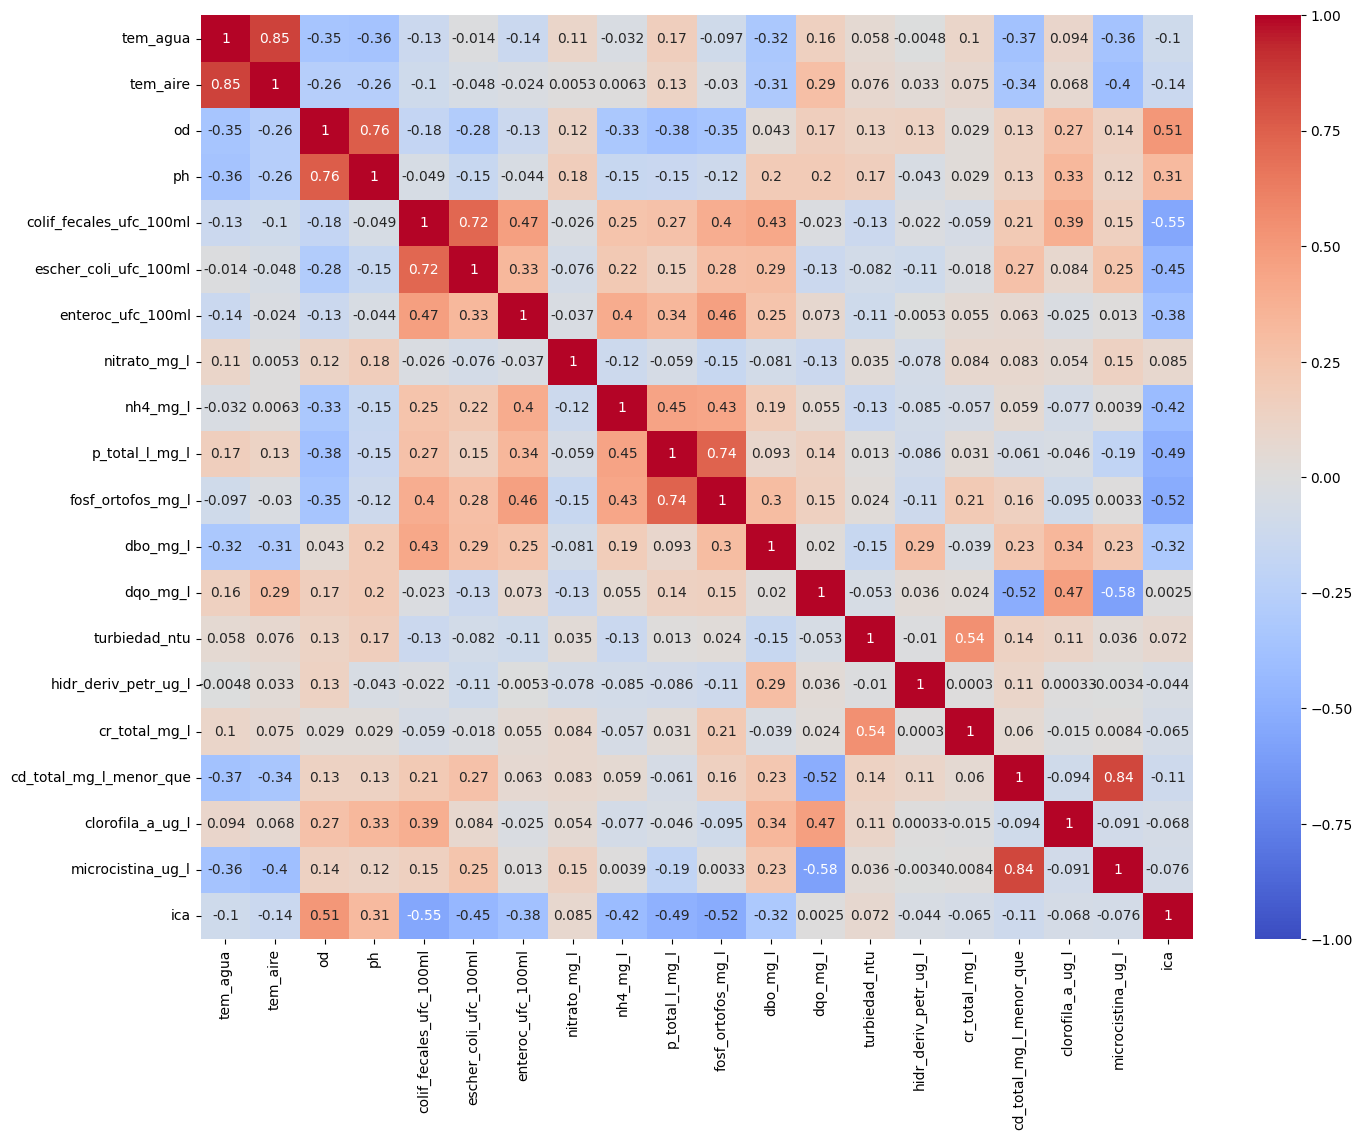

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

# imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

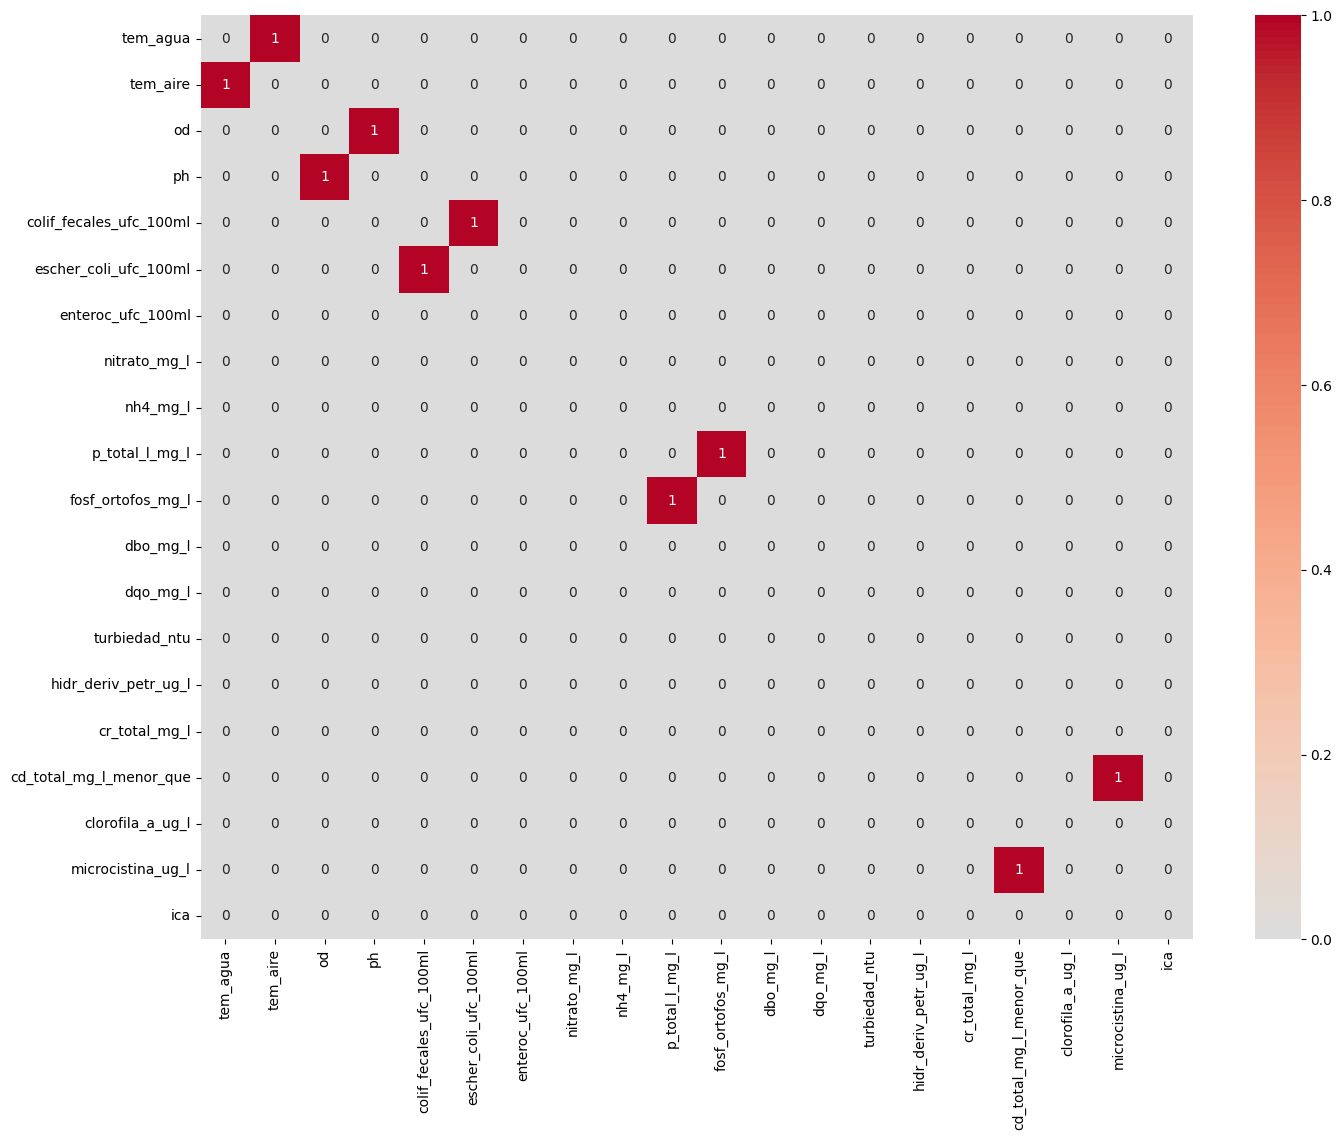

In [192]:
import matplotlib.pyplot as plt
import numpy as np

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.7
correlation_matrix_umbralizada = correlation_matrix.abs() > 0.7
# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

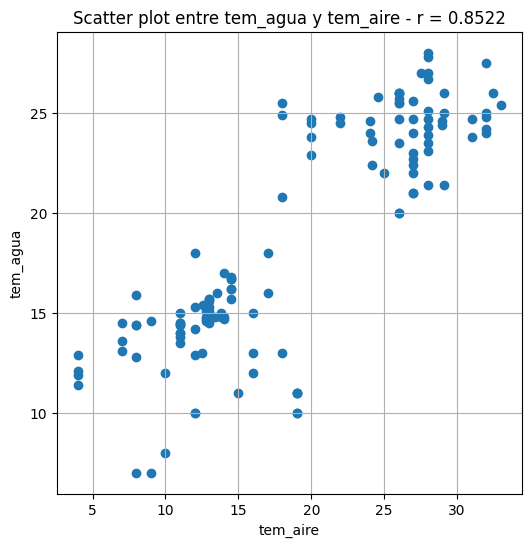

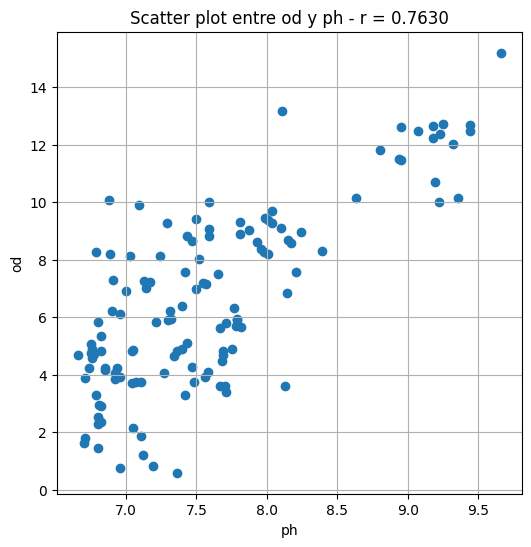

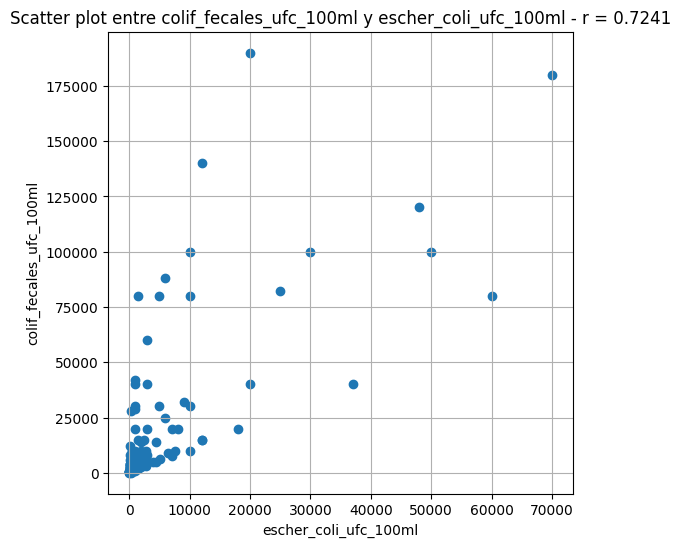

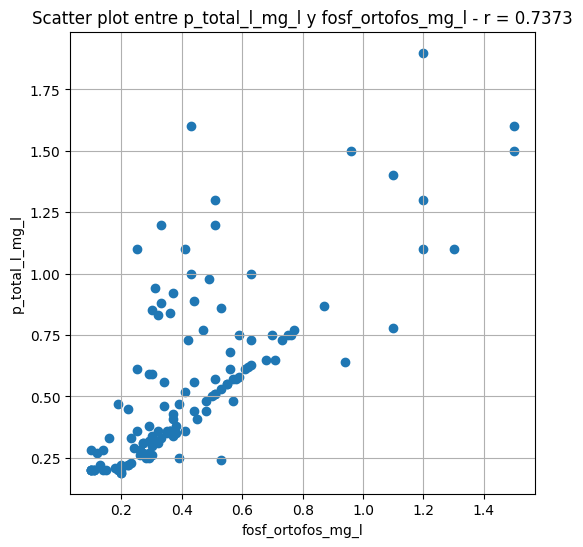

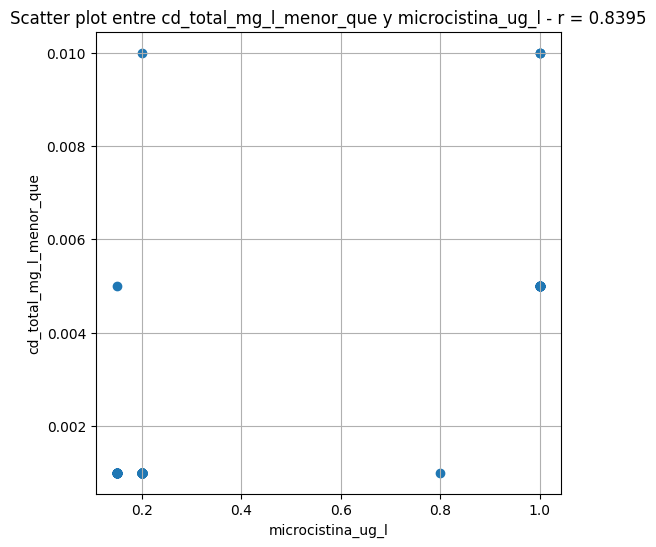

In [193]:
for i, col in enumerate(correlation_matrix_umbralizada.columns):
  # y por cada una de las filas (para eso usamos el índice)
  for j in range(i,len(correlation_matrix_umbralizada.index)):
    # extraemos el nombre de la fila en la que estamos
    row = correlation_matrix_umbralizada.index[j]
    # si en esa posición tenemos un True en la matriz umbralizada
    if correlation_matrix_umbralizada.loc[row, col]:
      # nos traemos el valor de esa correlación
      correlation = correlation_matrix.loc[row, col]
      # representamos en un scatter plot cuadrado los valores de ambas variables
      plt.figure(figsize=(6, 6))
      plt.scatter(preprocessed_dataset[row], preprocessed_dataset[col])
      # y lo mostramos bonito
      plt.title(f"Scatter plot entre {col} y {row} - r = {correlation:.4f}")
      plt.xlabel(row)
      plt.ylabel(col)
      plt.grid(True)
      plt.show()

In [194]:
import webbrowser
from pathlib import Path
from ydata_profiling import ProfileReport

# Verificamos si el archivo ya existe
output_file = "calidad del agua.html"
if not Path(output_file).exists():
    try:
        # Generamos el reporte
        report = ProfileReport(preprocessed_dataset)
        
        # Guardamos el reporte como un archivo HTML
        report.to_file(output_file=output_file)
        print(f"Reporte generado y guardado como {output_file}.")
    except Exception as e:
        print(f"Ocurrió un error al generar el reporte: {e}")
else:
    print("El archivo ya está creado.")

# Abrir el archivo HTML
webbrowser.open(output_file)


El archivo ya está creado.


True

In [195]:
preprocessed_dataset['enteroc_ufc_100ml'] = preprocessed_dataset['enteroc_ufc_100ml'].replace(28000, 2800)
preprocessed_dataset['enteroc_ufc_100ml'].value_counts().sort_index(ascending=False)

enteroc_ufc_100ml
6200    1
5600    1
4800    1
4600    2
3700    1
       ..
10      5
6       1
5       2
4       1
2       1
Name: count, Length: 72, dtype: int64

In [212]:
preprocessed_dataset.columns

Index(['sitios', 'campaña', 'tem_agua', 'tem_aire', 'od', 'ph', 'olores',
       'color', 'espumas', 'mat_susp', 'colif_fecales_ufc_100ml',
       'escher_coli_ufc_100ml', 'enteroc_ufc_100ml', 'nitrato_mg_l',
       'nh4_mg_l', 'p_total_l_mg_l', 'fosf_ortofos_mg_l', 'dbo_mg_l',
       'dqo_mg_l', 'turbiedad_ntu', 'hidr_deriv_petr_ug_l', 'cr_total_mg_l',
       'cd_total_mg_l_menor_que', 'clorofila_a_ug_l', 'microcistina_ug_l',
       'ica', 'calidad_de_agua'],
      dtype='object')

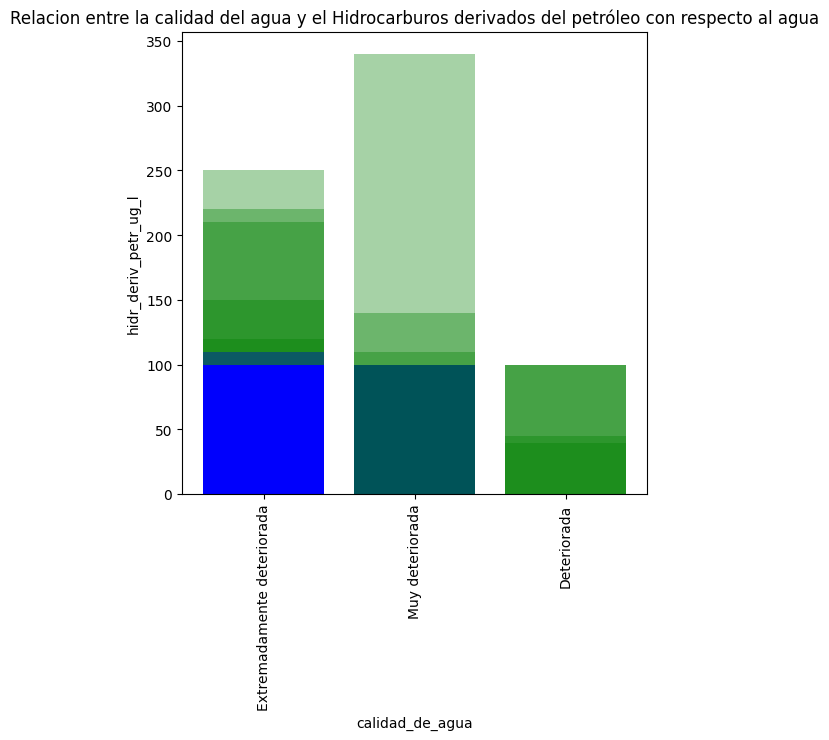

In [222]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

# Filtrar los datos por CHAS
color_false = preprocessed_dataset[preprocessed_dataset["color"] == False]
color_true = preprocessed_dataset[preprocessed_dataset["color"] == True]

# Graficar los puntos con colores diferentes
plt.bar(color_false["calidad_de_agua"], color_false["hidr_deriv_petr_ug_l"], color="green", alpha=0.35, label="No presentan color")
plt.bar(color_true["calidad_de_agua"], color_true["hidr_deriv_petr_ug_l"], color="blue", alpha=0.35, label="Presentan color")

# Agregar etiquetas a los ejes
plt.xlabel("calidad_de_agua")
plt.ylabel("hidr_deriv_petr_ug_l")

# Agregar un título al gráfico
plt.title("Relacion entre la calidad del agua y el Hidrocarburos derivados del petróleo con respecto al agua")
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

In [198]:
data_olores = preprocessed_dataset[preprocessed_dataset['olores']]
data_olores

,sitios,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
8,Canal Aliviador y Río Lujan,verano,24.6,24.0,1.21,7.12,True,True,True,True,...,6.3,30.0,17.0,100.0,0.005,0.001,0.01300,0.15,26,Extremadamente deteriorada
10,Canal Aliviador y Río Lujan,invierno,14.7,14.0,2.30,6.80,True,False,False,False,...,5.0,30.0,21.0,100.0,0.005,0.001,0.01000,0.20,34,Extremadamente deteriorada
11,Canal Aliviador y Río Lujan,primavera,24.6,29.0,1.81,6.71,True,True,False,True,...,6.0,43.0,19.0,100.0,0.005,0.001,0.03026,0.20,34,Extremadamente deteriorada
16,Río Reconquista y Río Lujan,verano,24.8,22.0,2.95,6.81,True,False,True,False,...,2.3,30.0,50.0,100.0,0.005,0.001,0.00000,0.15,35,Extremadamente deteriorada
17,Río Reconquista y Río Lujan,otoño,15.3,13.0,4.74,6.75,True,True,False,False,...,7.2,3.3,30.0,110.0,1.000,0.005,0.01000,1.00,29,Extremadamente deteriorada
18,Río Reconquista y Río Lujan,invierno,14.8,14.0,5.33,6.82,True,False,False,False,...,2.1,30.0,21.0,100.0,0.005,0.001,0.01000,0.20,57,Muy deteriorada
19,Río Reconquista y Río Lujan,primavera,24.7,31.0,5.07,6.75,True,True,False,True,...,2.2,33.0,31.0,100.0,0.005,0.001,0.00119,0.20,42,Extremadamente deteriorada
20,Rio Tigre 100m antes del Rio Luján,verano,24.5,22.0,1.86,7.11,True,True,False,True,...,NaN,32.0,13.0,100.0,0.005,0.001,0.00000,0.15,28,Extremadamente deteriorada
21,Rio Tigre 100m antes del Rio Luján,otoño,15.3,12.0,4.25,6.74,True,True,False,False,...,6.5,5.6,30.0,85.0,1.000,0.010,0.01000,1.00,31,Extremadamente deteriorada
22,Rio Tigre 100m antes del Rio Luján,invierno,14.4,8.0,1.46,6.80,True,True,True,False,...,8.6,30.0,16.0,100.0,0.005,0.001,0.01100,0.20,30,Extremadamente deteriorada


In [199]:
variables_cuantitativas = data_olores.drop(['sitios','campaña','olores','color','espumas','mat_susp','calidad_de_agua'], axis=1)
correlation_matrix = variables_cuantitativas.corr()
correlation_matrix

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica
tem_agua,1.000000,0.826732,-0.329788,-0.239609,-0.621605,-0.449871,-0.259290,0.420843,0.068434,0.009054,-0.296863,-0.223687,-0.173540,0.227197,0.149162,-0.293542,-0.271526,-0.269192,-0.333189,0.006373
tem_aire,0.826732,1.000000,-0.018239,0.127675,-0.381670,-0.402418,-0.119091,0.156795,0.184833,0.167090,-0.002993,-0.039664,0.159055,-0.044587,0.352667,-0.465510,-0.408456,0.017613,-0.485865,-0.014614
od,-0.329788,-0.018239,1.000000,0.484018,0.218626,0.125766,0.084440,-0.226553,-0.166029,-0.090607,0.076253,-0.223315,0.271232,-0.241648,0.227072,-0.032093,0.010654,0.173090,-0.006872,0.414468
ph,-0.239609,0.127675,0.484018,1.000000,0.452430,0.177634,0.492571,-0.105402,0.194151,0.644700,0.835490,0.351382,0.815845,-0.668950,0.210888,-0.342475,-0.308643,0.212708,-0.338194,-0.282184
colif_fecales_ufc_100ml,-0.621605,-0.381670,0.218626,0.452430,1.000000,0.681672,0.512919,-0.020191,0.083677,0.416245,0.591834,0.545331,0.221502,-0.323357,0.101764,0.270509,0.377237,0.210334,0.280890,-0.538148
escher_coli_ufc_100ml,-0.449871,-0.402418,0.125766,0.177634,0.681672,1.000000,0.794645,0.009728,0.016275,0.044001,0.201264,0.222944,0.046021,0.023986,0.006264,0.536851,0.708520,0.030421,0.537455,-0.400308
enteroc_ufc_100ml,-0.259290,-0.119091,0.084440,0.492571,0.512919,0.794645,1.000000,0.005121,0.307375,0.341117,0.424270,0.196655,0.440539,-0.157297,0.110082,0.152632,0.296953,0.087680,0.141406,-0.538085
nitrato_mg_l,0.420843,0.156795,-0.226553,-0.105402,-0.020191,0.009728,0.005121,1.000000,0.172311,0.428039,-0.006223,-0.173172,-0.343954,0.292932,-0.191886,0.289480,0.242915,-0.565173,0.226882,-0.287949
nh4_mg_l,0.068434,0.184833,-0.166029,0.194151,0.083677,0.016275,0.307375,0.172311,1.000000,0.523111,0.290375,0.113192,0.259337,-0.007410,0.036299,-0.131293,-0.118552,-0.186068,-0.154275,-0.383470
p_total_l_mg_l,0.009054,0.167090,-0.090607,0.644700,0.416245,0.044001,0.341117,0.428039,0.523111,1.000000,0.825350,0.358200,0.517554,-0.396698,0.100679,-0.263718,-0.236814,-0.181061,-0.295635,-0.638852


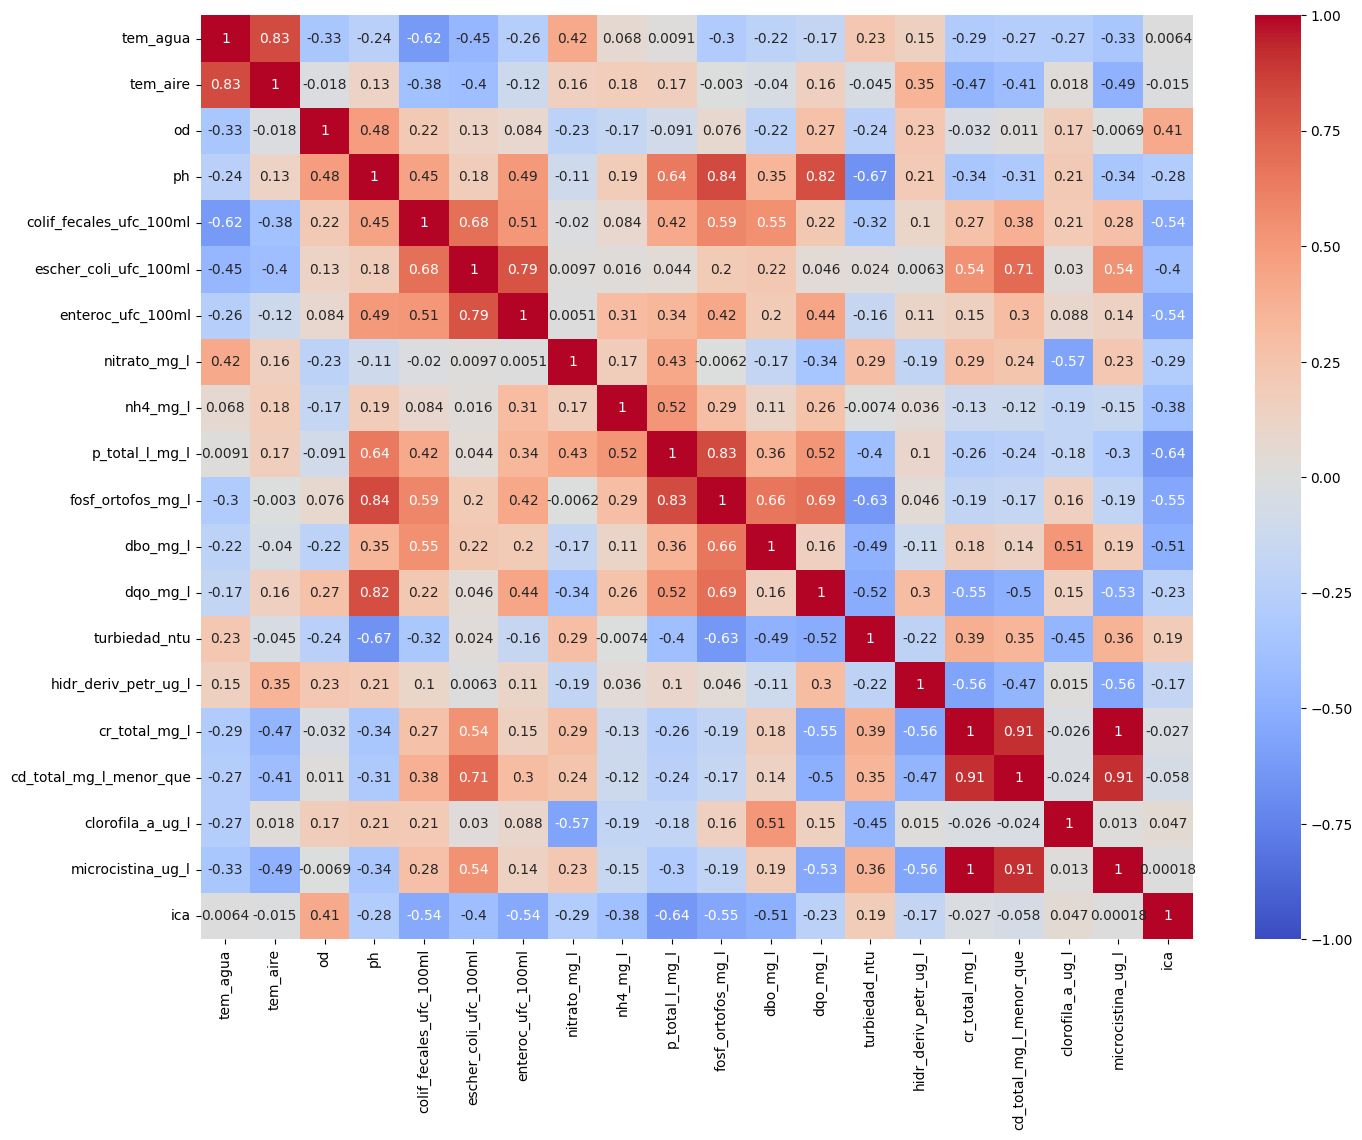

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

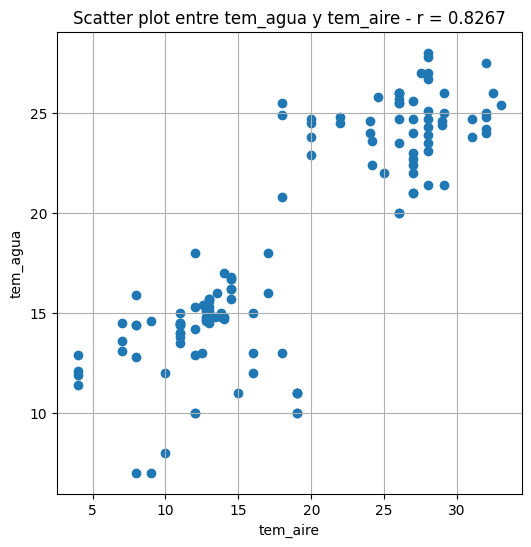

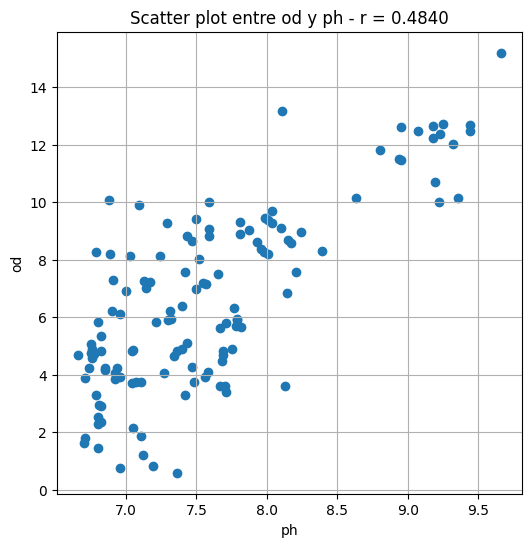

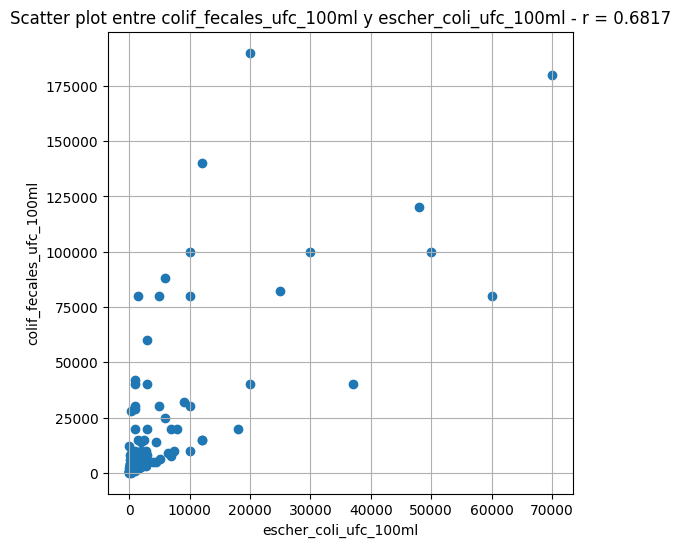

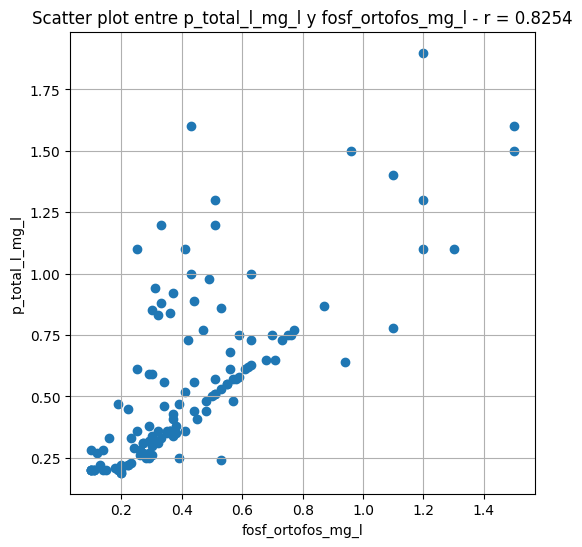

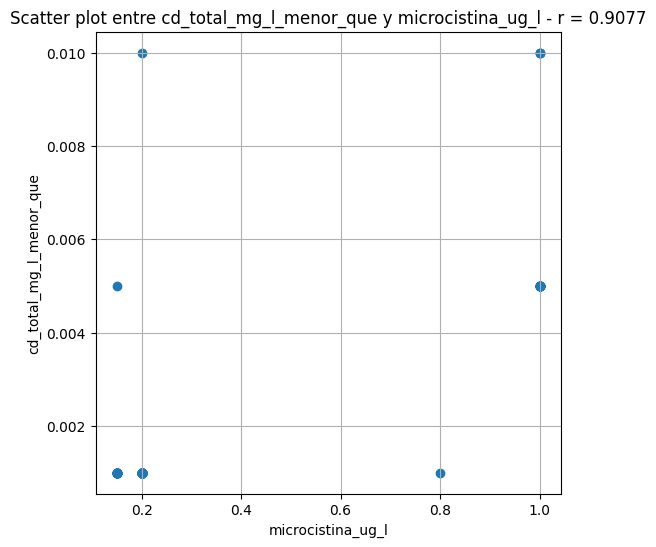

In [201]:
for i, col in enumerate(correlation_matrix_umbralizada.columns):
  # y por cada una de las filas (para eso usamos el índice)
  for j in range(i,len(correlation_matrix_umbralizada.index)):
    # extraemos el nombre de la fila en la que estamos
    row = correlation_matrix_umbralizada.index[j]
    # si en esa posición tenemos un True en la matriz umbralizada
    if correlation_matrix_umbralizada.loc[row, col]:
      # nos traemos el valor de esa correlación
      correlation = correlation_matrix.loc[row, col]
      # representamos en un scatter plot cuadrado los valores de ambas variables
      plt.figure(figsize=(6, 6))
      plt.scatter(preprocessed_dataset[row], preprocessed_dataset[col])
      # y lo mostramos bonito
      plt.title(f"Scatter plot entre {col} y {row} - r = {correlation:.4f}")
      plt.xlabel(row)
      plt.ylabel(col)
      plt.grid(True)
      plt.show()

In [202]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos las columnas numéricas para la normalización
numeric_cols = preprocessed_dataset.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

preprocessed_dataset_scaler = preprocessed_dataset.copy()
# Ajustamos el scaler a los datos y transformamos los datos
preprocessed_dataset_scaler[numeric_cols] = scaler.fit_transform(preprocessed_dataset[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
preprocessed_dataset_scaler.head()

,sitios,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,Canal Villanueva y Río Luján,verano,0.885714,0.793103,0.227242,0.100000,False,False,False,True,...,0.000000,0.201742,0.268649,0.279496,0.000000,0.000000,0.000000,0.000000,0.333333,Extremadamente deteriorada
1,Canal Villanueva y Río Luján,otoño,0.409524,0.310345,0.526352,0.043333,False,False,False,False,...,0.175000,NaN,0.122379,0.309517,0.022616,0.444444,0.011902,1.000000,0.458333,Muy deteriorada
2,Canal Villanueva y Río Luján,invierno,0.371429,0.310345,0.637235,0.143333,False,False,False,False,...,0.000000,0.201742,0.107752,0.279496,0.000000,0.000000,0.011902,0.058824,0.791667,Muy deteriorada
3,Canal Villanueva y Río Luján,primavera,0.828571,0.862069,0.457906,0.083333,False,False,False,True,...,0.000000,0.208999,0.195514,0.279496,0.000000,0.000000,0.004237,0.058824,0.604167,Muy deteriorada
5,Río Lujan y Arroyo Caraguatá,otoño,0.414286,0.310345,0.431896,0.113333,False,False,False,False,...,0.191667,NaN,0.122379,0.429601,0.022616,0.444444,0.011902,1.000000,0.270833,Extremadamente deteriorada


In [203]:
from sklearn.cluster import KMeans

nro_cluster = 4

# separamos las features de los nombres de los países
preprocessed_dataset_scaler = preprocessed_dataset_scaler.dropna()
sitios = preprocessed_dataset_scaler['sitios']
features_sitios = preprocessed_dataset_scaler.drop(columns=['sitios','campaña','olores','color','espumas','mat_susp','calidad_de_agua'])

# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=nro_cluster, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(features_sitios)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(features_sitios)
print(clusters_kmeans)

[1 2 1 2 1 1 3 2 1 1 3 2 1 1 3 2 1 3 2 1 1 3 2 1 1 2 1 1 1 1 2 1 1 2 1 1 3
 2 1 1 3 2 1 1 3 2 1 1 3 2 1 1 3 2 1 2 1 3 2 1 3 2 1 3 2 1 3 2 1 3 2 1 3 2
 1 1 2 1 0 2 0 2 1 0 2 1 0 1 1 0 2 1 3 2 1 1 1 0 2 1 2 1 2 1 3 2 1 2 1 2 2
 2 1 2 2 2]


In [204]:
import pandas as pd

# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Sitios': sitios, 'Cluster': clusters_kmeans})

# Imprimimos los países de cada cluster
for cluster_num in range(nro_cluster):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Sitios'].tolist())


Cluster 0:
['Calle 14 y Costa - Salida cloaca', 'Puerto Trinidad calle 47', 'Costanera Hudson Calle 63', 'Camping Eva Perón', 'Toma de agua Club de Pesca', 'Ensenada Prefectura Isla Santiago']

Cluster 1:
['Canal Villanueva y Río Luján', 'Canal Villanueva y Río Luján', 'Río Lujan y Arroyo Caraguatá', 'Canal Aliviador y Río Lujan', 'Canal Aliviador y Río Lujan', 'Río Carapachay y Arroyo Gallo Fiambre', 'Río Carapachay y Arroyo Gallo Fiambre', 'Río Reconquista y Río Lujan', 'Río Reconquista y Río Lujan', 'Rio Tigre 100m antes del Rio Luján', 'Río Lujan y Canal San Fernando', 'Río Lujan y Canal San Fernando', 'Río Capitán y Río San Antonio', 'Río Capitán y Río San Antonio', 'Arroyo Abra Vieja y Santa Rosa', 'Arroyo Abra Vieja y Santa Rosa', 'Del Arca', 'Del Arca', 'Reserva Ecológica', 'Reserva Ecológica', 'Playa Espigón de Pacheco', 'Playa Espigón de Pacheco', 'Perú Puente', 'Perú Puente', 'Reserva Barrio El Ceibo ', 'Reserva Barrio El Ceibo ', 'Puerto de Olivos Espigón', 'Puerto de Oliv

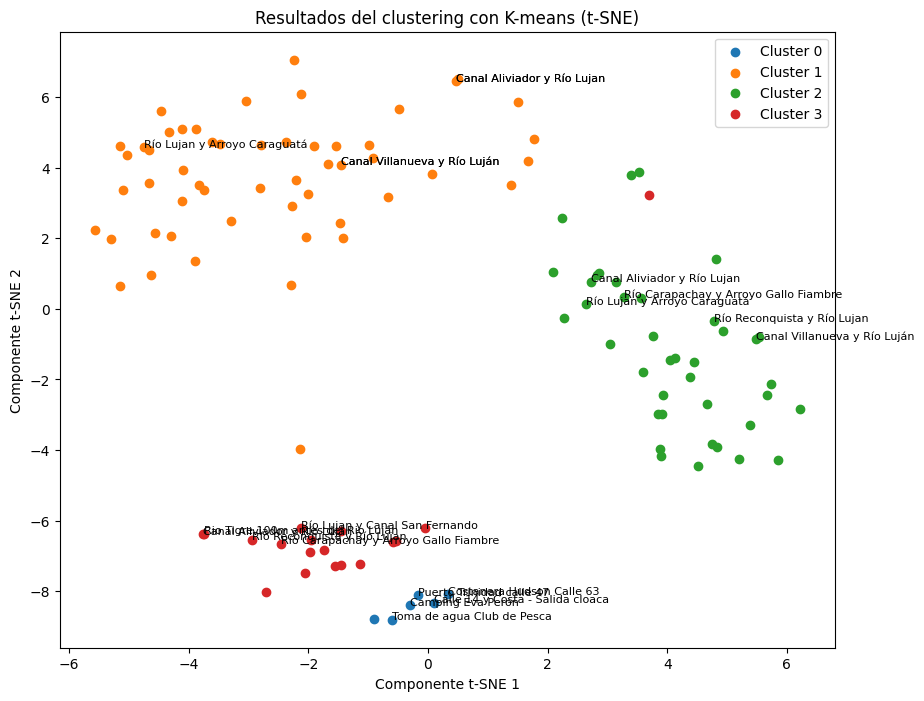

In [205]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_sitios)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'Country': sitios})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(nro_cluster):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  # Seleccionar 5 países para etiquetar en cada cluster, incluyendo Argentina si está presente
  countries_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Country'].tolist()
  if 'Argentina' in countries_to_label:
    countries_to_label.remove('Argentina')
    countries_to_label = ['Argentina'] + countries_to_label[:4]
  else:
    countries_to_label = countries_to_label[:5]

  for country in countries_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Country'] == country)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], country, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

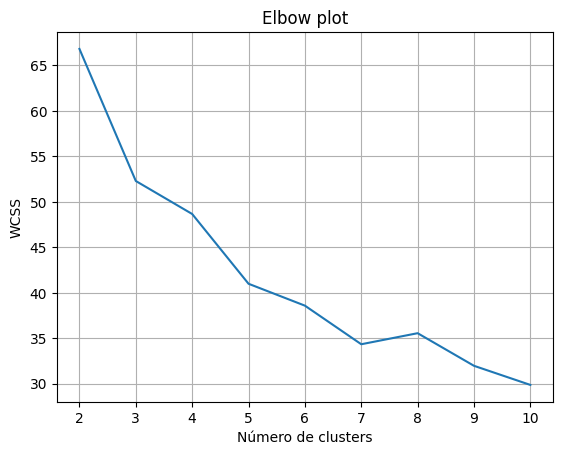

In [206]:
from sklearn.cluster import KMeans

# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features_sitios)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [207]:
# inicializamos un contador
counter = 0
# creamos una lista para guardar los valores únicos
unique_values = []
# iteramos sobre los valores de la columna
for val in preprocessed_dataset["sitios"]:
  # si el valor incluye "Data Scientist"
  if "Playa" in val or "cloaca" in val:
    # incrementamos el contador
    counter += 1
    # si el valor no esta en la lista de valores únicos
    if val not in unique_values:
      # lo agregamos
      unique_values.append(val)

# imprimimos el contador y la lista de valores únicos
print("Cantidad de valores que incluyen 'Playa' o  cloaca:", counter)
print("Valores únicos:", unique_values)
unique_values

Cantidad de valores que incluyen 'Playa' o  cloaca: 17
Valores únicos: ['Playa Espigón de Pacheco', 'Calle 14 y Costa - Salida cloaca', 'Diagonal 66 (descarga cloaca)', 'Playa La Bagliardi', 'Playa La Balandra']


['Playa Espigón de Pacheco',
 'Calle 14 y Costa - Salida cloaca',
 'Diagonal 66 (descarga cloaca)',
 'Playa La Bagliardi',
 'Playa La Balandra']

In [208]:
contactos = preprocessed_dataset[preprocessed_dataset['sitios'].isin(unique_values)]
contactos

,sitios,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
48,Playa Espigón de Pacheco,verano,27.0,28.0,5.66,7.82,False,False,False,True,...,2.0,30.0,35.0,100.0,0.005,0.001,0.00100,0.15,42,Extremadamente deteriorada
49,Playa Espigón de Pacheco,otoño,15.0,16.0,9.44,7.99,False,False,False,False,...,13.0,3.9,30.0,340.0,1.000,0.010,0.01000,1.00,48,Muy deteriorada
50,Playa Espigón de Pacheco,invierno,15.7,14.5,8.14,7.03,False,False,False,False,...,5.5,30.0,23.0,100.0,0.005,0.001,0.01000,0.20,41,Extremadamente deteriorada
51,Playa Espigón de Pacheco,primavera,27.5,32.0,7.19,7.55,False,False,False,False,...,2.0,42.0,7.6,100.0,0.005,0.001,0.01000,0.20,54,Muy deteriorada
117,Calle 14 y Costa - Salida cloaca,otoño,13.0,18.0,15.20,9.66,False,False,False,False,...,3.0,9.5,40.0,65.0,1.000,0.005,0.01000,1.00,42,Extremadamente deteriorada
118,Calle 14 y Costa - Salida cloaca,invierno,12.0,16.0,10.13,8.63,False,False,False,False,...,7.1,64.0,16.0,100.0,0.005,0.001,0.01000,0.20,45,Muy deteriorada
119,Calle 14 y Costa - Salida cloaca,primavera,27.0,27.5,12.65,9.18,False,False,False,False,...,NaN,140.0,70.0,100.0,0.005,0.001,0.21265,0.20,39,Extremadamente deteriorada
149,Diagonal 66 (descarga cloaca),verano,24.0,27.0,4.28,7.47,True,True,True,True,...,6.3,45.0,5.9,100.0,0.005,0.001,0.00500,0.15,26,Extremadamente deteriorada
151,Diagonal 66 (descarga cloaca),invierno,10.0,12.0,6.32,7.77,False,False,False,False,...,6.9,35.0,10.0,100.0,0.005,0.010,0.01000,0.20,37,Extremadamente deteriorada
152,Diagonal 66 (descarga cloaca),primavera,10.0,19.0,5.79,7.71,True,True,True,True,...,11.0,55.0,7.0,100.0,0.005,0.001,0.02551,0.20,26,Extremadamente deteriorada
